In [1]:
import os
import re

from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [2]:
나의_과학기술 = '/home/sjt/space/github/references/나의_과학기술'

list_reference = []

for path, subdirs, files in os.walk(나의_과학기술):
    for f in files:
        list_reference.append([path.split('/')[-1], f, path+'/'+f])
        
df_reference = pd.DataFrame(list_reference, columns=['분류','내용','경로'])
df_reference


,분류,내용,경로
0,프로그래밍,latex.md,/home/sjt/space/github/references/나의_과학기술/과학기술...
1,프로그래밍,오늘코드.md,/home/sjt/space/github/references/나의_과학기술/과학기술...
2,프로그래밍,이것이_취업을_위한_백엔드_개발이다_with_자바.md,/home/sjt/space/github/references/나의_과학기술/과학기술...
3,프로그래밍,게임_디자인을_위한_기초_이론.md,/home/sjt/space/github/references/나의_과학기술/과학기술...
4,프로그래밍,django.md,/home/sjt/space/github/references/나의_과학기술/과학기술...
...,...,...,...
92,영어와문학,TOEIC.md,/home/sjt/space/github/references/나의_과학기술/인문사회...
93,정치외교학,노벨_평화상.md,/home/sjt/space/github/references/나의_과학기술/인문사회...
94,정치외교학,README.md,/home/sjt/space/github/references/나의_과학기술/인문사회...
95,인지과학,낸시 캔위셔_The Human Brain.md,/home/sjt/space/github/references/나의_과학기술/인문사회...


In [3]:
df_reference['용량'] = [os.path.getsize(i) for i in df_reference['경로']]
df_reference

,분류,내용,경로,용량
0,프로그래밍,latex.md,/home/sjt/space/github/references/나의_과학기술/과학기술...,720
1,프로그래밍,오늘코드.md,/home/sjt/space/github/references/나의_과학기술/과학기술...,40
2,프로그래밍,이것이_취업을_위한_백엔드_개발이다_with_자바.md,/home/sjt/space/github/references/나의_과학기술/과학기술...,1005
3,프로그래밍,게임_디자인을_위한_기초_이론.md,/home/sjt/space/github/references/나의_과학기술/과학기술...,483
4,프로그래밍,django.md,/home/sjt/space/github/references/나의_과학기술/과학기술...,1556
...,...,...,...,...
92,영어와문학,TOEIC.md,/home/sjt/space/github/references/나의_과학기술/인문사회...,252
93,정치외교학,노벨_평화상.md,/home/sjt/space/github/references/나의_과학기술/인문사회...,21882
94,정치외교학,README.md,/home/sjt/space/github/references/나의_과학기술/인문사회...,19
95,인지과학,낸시 캔위셔_The Human Brain.md,/home/sjt/space/github/references/나의_과학기술/인문사회...,0


In [4]:
df_reference_개수 = pd.DataFrame(list(Counter(df_reference['분류']).items()), columns=['분류','개수'])
df_reference_용량 = df_reference[['분류','용량']].groupby('분류').sum().reset_index()

df_reference_정리 = df_reference_개수.merge(df_reference_용량, on='분류')
df_reference_정리

,분류,개수,용량
0,프로그래밍,15,10391
1,컴퓨터공학,4,13168
2,데이터분석,21,58590
3,생명과학,11,50973
4,물리화학,8,57793
5,수학_통계,12,54050
6,알고리즘,6,16124
7,언어학,1,177
8,정보학,1,1867
9,법학,1,178


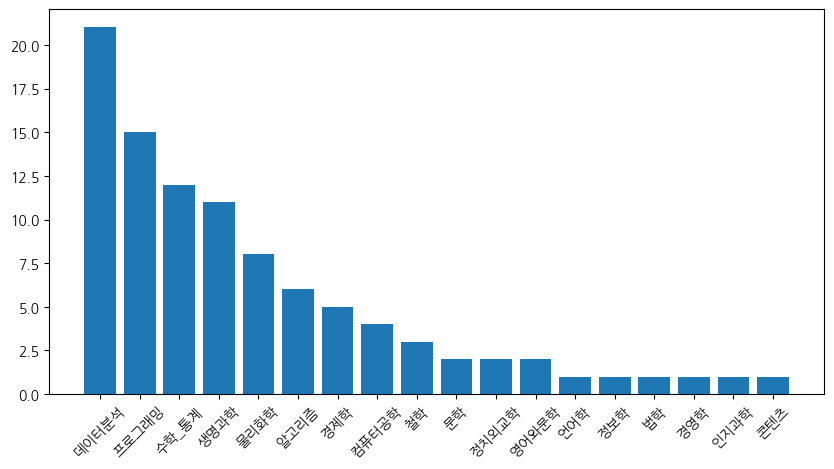

In [5]:
df_reference_정리 = df_reference_정리.sort_values('개수', ascending=False)

fig, ax = plt.subplots(
    figsize=(10,5)
)

ax.bar(
    df_reference_정리['분류'],
    df_reference_정리['개수']
)

plt.xticks(rotation=45);

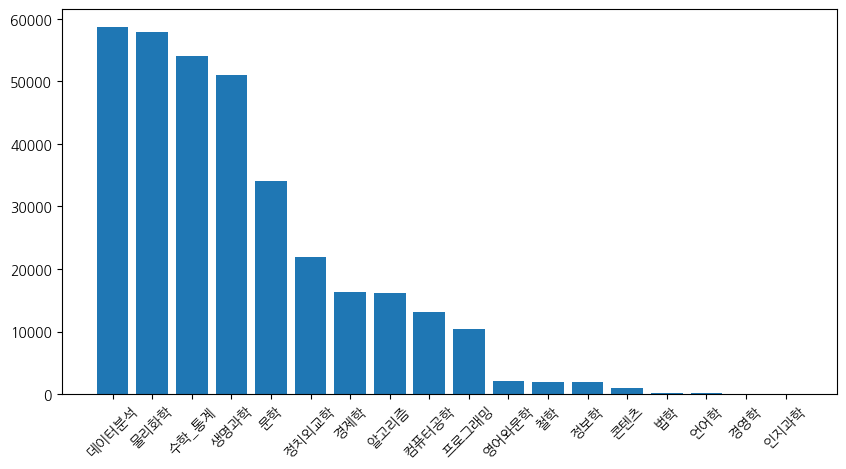

In [6]:
df_reference_정리 = df_reference_정리.sort_values('용량', ascending=False)

fig, ax = plt.subplots(
    figsize=(10,5)
)

ax.bar(
    df_reference_정리['분류'],
    df_reference_정리['용량']
)

plt.xticks(rotation=45);